<a href="https://colab.research.google.com/github/CoderAPS/HuBMAP/blob/main/HuBMAP_image_process_20230620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls /gdrive/MyDrive/DATA/HuBMAP

annotation_info.csv  masks_grey_bkgrnd	    test	    val_list.csv
images		     masks_white_bkgrnd     test_list.csv   wsi_meta.csv
images_info.csv      polygons.jsonl	    tile_meta.csv
masks		     sample_submission.csv  train_list.csv


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm_notebook

%matplotlib inline

In [5]:
# Make a copy of normalize_he_image.py to current directory
!cp /gdrive/MyDrive/python_modules/normalize_he_image_v2.py .

In [6]:
# import custom module
import normalize_he_image_v2

In [7]:
annotations_info = pd.read_csv('/gdrive/MyDrive/DATA/HuBMAP/annotation_info.csv',index_col=0)
annotations_info.head()

,blood_vessel,glomerulus,unsure
0006ff2aa7cd,8,1,0
00168d1b7522,1,1,0
0033bbc76b6b,3,0,1
003504460b3a,7,0,0
004daf1cbe75,9,1,0


In [8]:
# Load lists assigned for train, val and test
train_list = pd.read_csv('/gdrive/MyDrive/DATA/HuBMAP/train_list.csv',index_col=0)
val_list = pd.read_csv('/gdrive/MyDrive/DATA/HuBMAP/val_list.csv',index_col=0)
test_list = pd.read_csv('/gdrive/MyDrive/DATA/HuBMAP/test_list.csv',index_col=0)


In [9]:
image_height = 512
image_width = 512
image_channels = 3

In [10]:
# Create and allocate memory for train, val and test images and masks
# Store image ids for each the thress datasets

train_images = np.zeros((len(train_list[:100]),image_height,image_width,image_channels),
                        dtype=np.uint8)
train_masks = np.zeros((len(train_list[:100]),image_height,image_width),dtype=np.uint8)


In [11]:
# Assign path file for images and masks
image_path_file = '/gdrive/MyDrive/DATA/HuBMAP/images/'
mask_path_file = '/gdrive/MyDrive/DATA/HuBMAP/masks/'

In [12]:
# Read images and mask for train dataset(takes about 30-50 min)
for idx, row in tqdm_notebook(enumerate(train_list[:100].iterrows()),total=len(train_list[:100])):
  id  = row[1]['train_id']
  image = cv2.imread(image_path_file + id + '.tif')
  mask = cv2.imread(mask_path_file + id + '_mask.tif',cv2.IMREAD_GRAYSCALE)

  train_images[idx] = image
  train_masks[idx] = mask

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# References
# Python OpenCV: Converting an image to black and white
# https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/

# Apply Canny Edge Detection on Image using OpenCV
# https://lindevs.com/apply-canny-edge-detection-on-image-using-opencv
# https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

# Edge Detection Using OpenCV (Canny and Sobel)
# https://learnopencv.com/edge-detection-using-opencv/


# Contour Detection using OpenCV
# https://learnopencv.com/contour-detection-using-opencv-python-c/

# How to change the contrast and brightness of an image using OpenCV in Python?
# https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python

# How to change the contrast and brightness of an image using OpenCV in Python?
# https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python


# Python OpenCV Overlaying or Blending Two Images
# https://www.etutorialspoint.com/index.php/319-python-opencv-overlaying-or-blending-two-images


In [63]:
# Display original images from train_images and their respective masks
# Use num to locate selected image from train_iamges
# Use id to locate mask from directory file masks_4d_alt
def display_images_masks(origal_image,id,modified_image=None):

  mask_path_file = '/gdrive/MyDrive/DATA/HuBMAP/masks_white_bkgrnd/'

  print(f"Annotation counts for image: {id}: \
  bood vessel: {annotations_info.loc[id,'blood_vessel']}, \
  glomerulus: {annotations_info.loc[id,'glomerulus']}, \
  unsure: {annotations_info.loc[id,'unsure']}.")


  plt.figure(figsize=(10,10))
  mask = plt.imread(mask_path_file + id + '_mask.tif')


  image_labels = None
  display_list = None

  if type(modified_image) is np.ndarray:
    image_labels = ['Original','Modified','Mask']
    display_list = [origal_image,modified_image,mask]
  else:
    image_labels = ['Original','Mask']
    display_list = [origal_image,mask]


  for idx,img in enumerate(display_list):
    plt.subplot(1,3,idx+1)
    plt.imshow(img)
    plt.title(f'{image_labels[idx]}: {id}') if idx == 0 else plt.title(f'{image_labels[idx]}')
    plt.xticks([])
    plt.yticks([])

  plt.show()


Annotation counts for image: b898dccf7911:   bood vessel: 5,   glomerulus: 0,   unsure: 4.


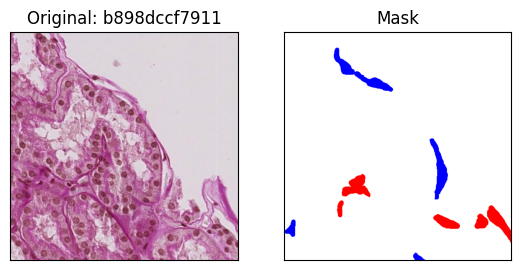

Annotation counts for image: 9a7bc8d347c4:   bood vessel: 11,   glomerulus: 0,   unsure: 5.


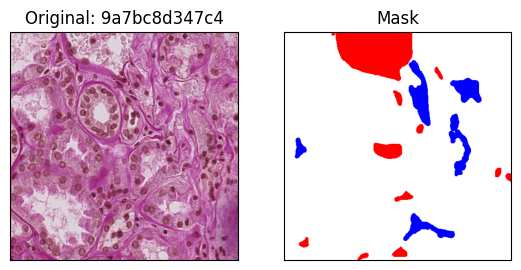

Annotation counts for image: 5ab182e75656:   bood vessel: 6,   glomerulus: 0,   unsure: 3.


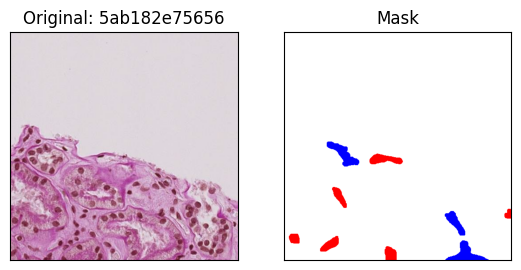

In [64]:
# Display original images and their respective masks
for _ in range(3):
  num = np.random.randint(0,len(train_images))
  id = train_list.loc[num,'train_id']
  image = train_images[num]
  display_images_masks(image,id)

In [103]:
def modify_image_contrast_brightness(image):

  # define the contrast and brightness value
  contrast = 2  # Contrast control: less than 1 reduce and greather than increase contrast
  brightness = -200 # Brightness control range: -127 to 127

  mod_image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

  return mod_image

In [81]:
def normalize_image_color(image):
  he,h,e = normalize_he_image_v2.normalize_HnE_stain(image)
  return e

Annotation counts for image: f6afc2903670:   bood vessel: 4,   glomerulus: 0,   unsure: 2.


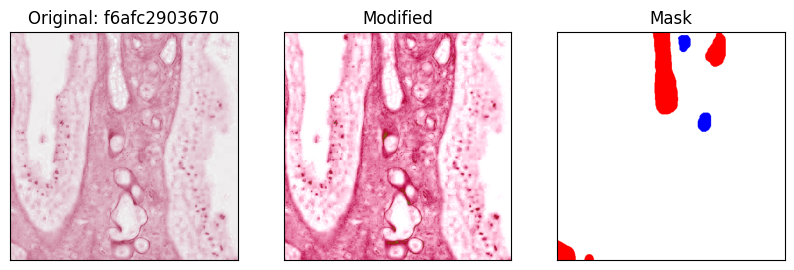

Annotation counts for image: fa207406c405:   bood vessel: 10,   glomerulus: 1,   unsure: 6.


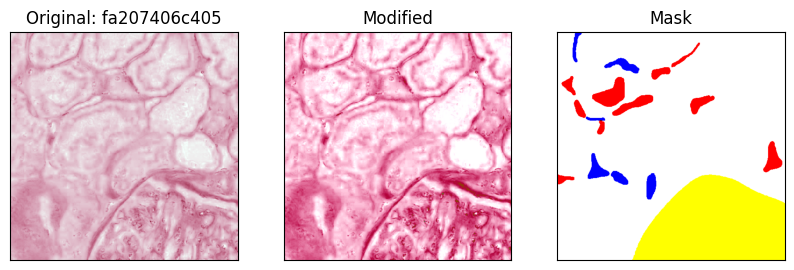

Annotation counts for image: af9c61e40ff5:   bood vessel: 4,   glomerulus: 1,   unsure: 3.


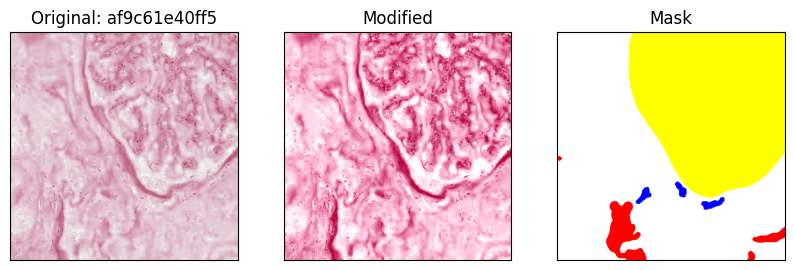

In [105]:
# Display original images and their respective masks
for _ in range(3):
  num = np.random.randint(0,len(train_images))
  id = train_list.loc[num,'train_id']
  image = train_images[num]
  image = normalize_image_color(image)
  mod_image = modify_image_contrast_brightness(image)
  display_images_masks(image,id,mod_image)

In [58]:
a = modify_image_contrast_brightness(train_images[0])

In [59]:
type(a)

numpy.ndarray